# RQ 2 Does the user reputation/badges reflect the quality of their answers/questions?

In [2]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import itertools
import datetime

In [19]:
# !pip install pyarrow

In [20]:
# !pip install fastparquet

## RQ 2.1 Is user reputation correlated to badges?

In [66]:
df = pd.read_parquet('parquet/rq2_1').drop('_Id', axis=1)

In [67]:
# Remove outliers
df.drop(df[df['count_all_badges'] > 5000].index, inplace=True)

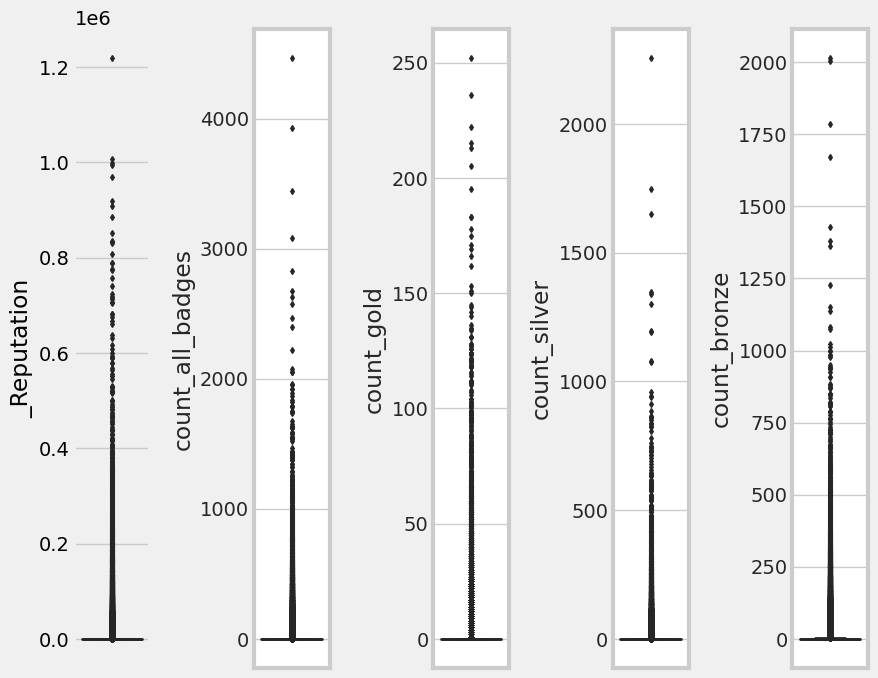

In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
l = df.select_dtypes(include=numerics).columns.values
number_of_columns = len(l)
number_of_rows = len(l)-1//number_of_columns
plt.figure(figsize=(number_of_columns+4,number_of_rows*8))
for i in range(0,len(l)):
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=rq2_1[l[i]], color='green', orient='v', linewidth=2, fliersize=3)
    plt.tight_layout()

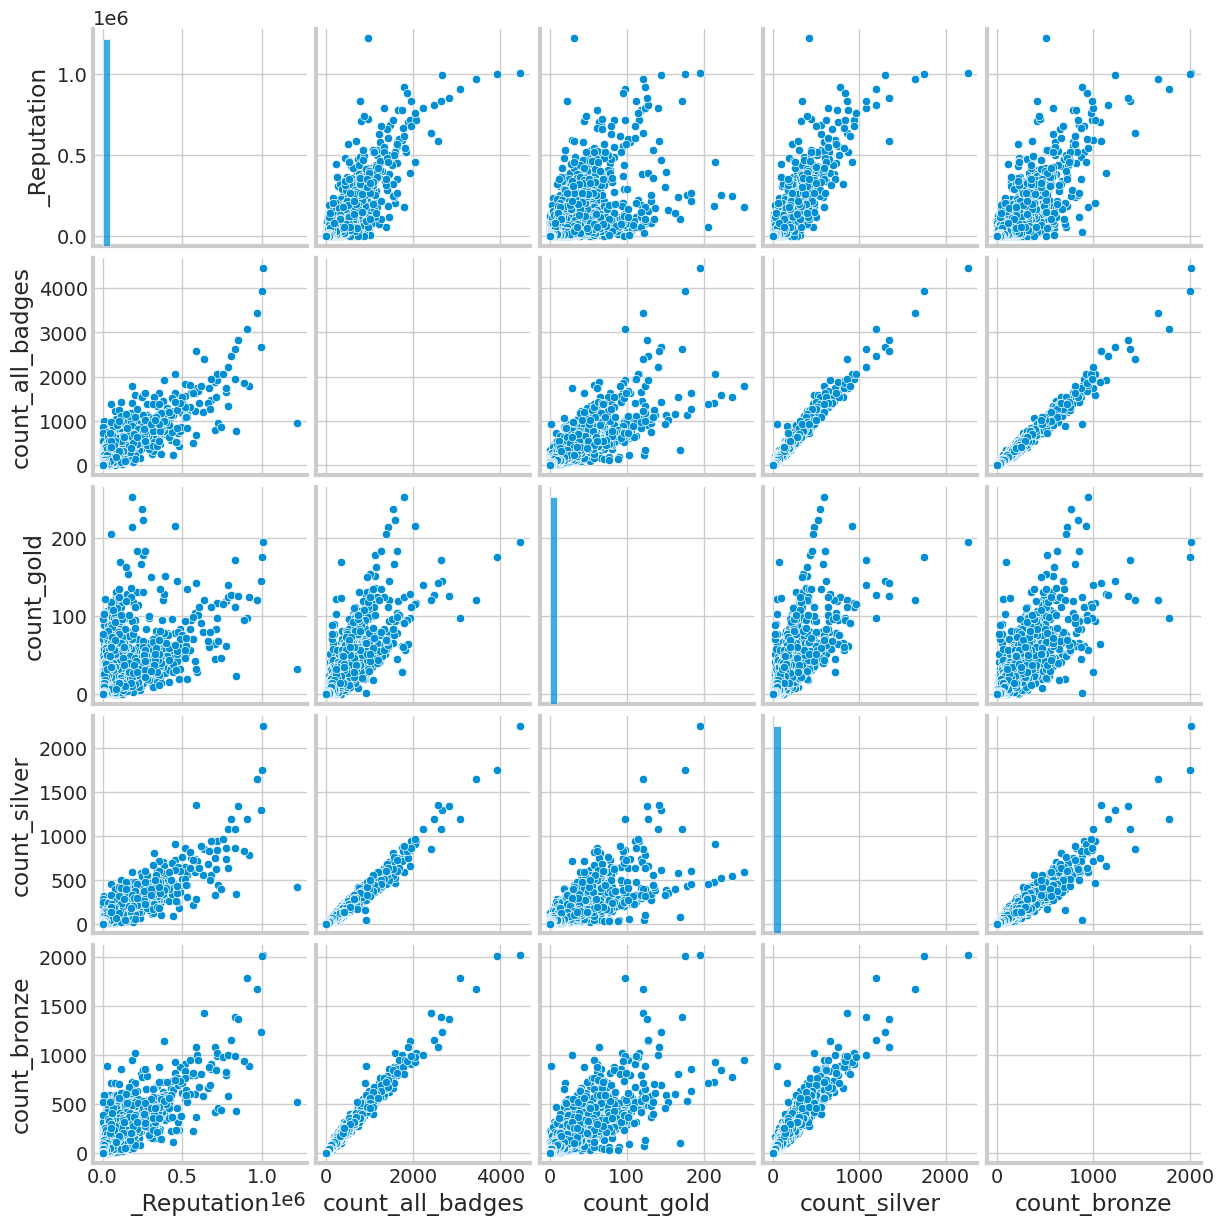

In [48]:
sns.pairplot(data=df, diag_kind='hist')
plt.show()

#### User Reputation and Count of All Badges

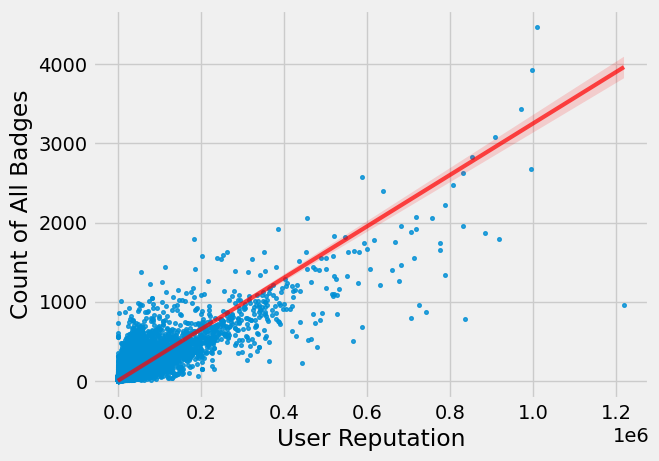

In [69]:
ax = sns.regplot(x=df['_Reputation'], y=df['count_all_badges'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Count of All Badges')
plt.show()

#### User Reputation and Count of Bronze Badges

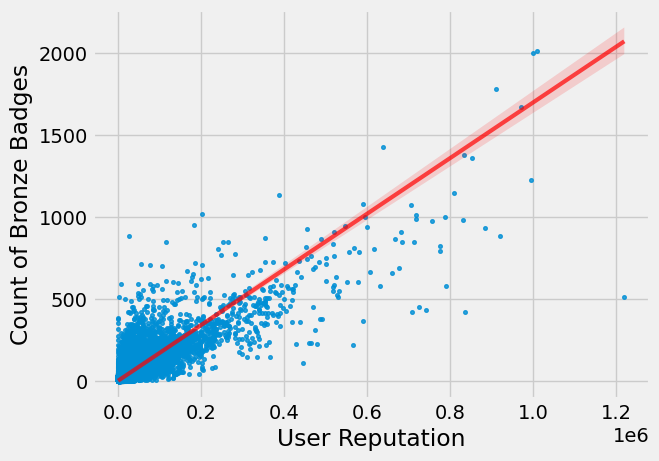

In [70]:
ax = sns.regplot(x=df['_Reputation'], y=df['count_bronze'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Count of Bronze Badges')
plt.show()

#### User Reputation and Count of Silver Badges

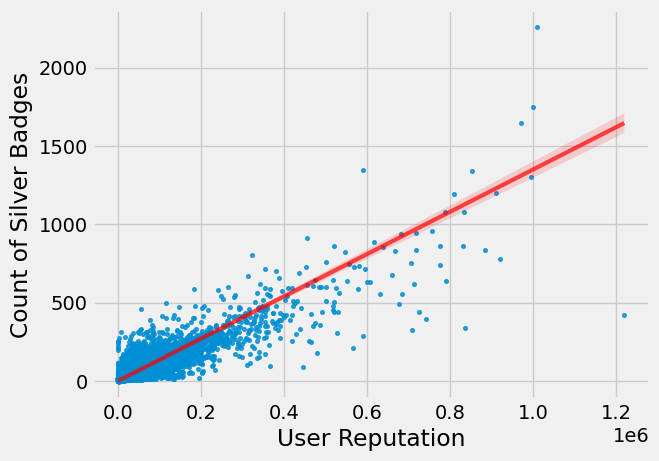

In [71]:
ax = sns.regplot(x=df['_Reputation'], y=df['count_silver'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Count of Silver Badges')
plt.show()

#### User Reputation and Count of Gold Badges

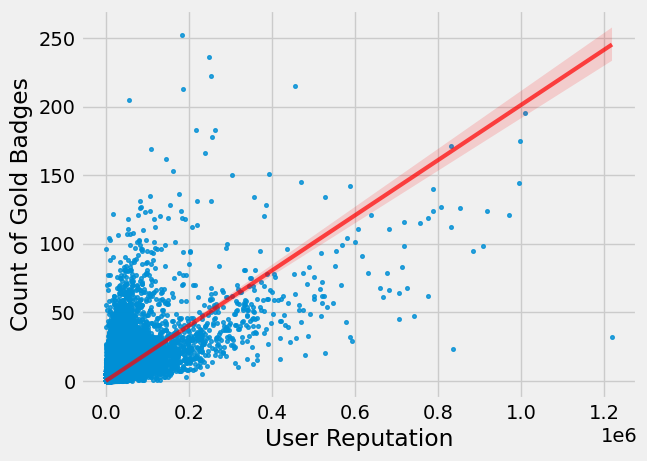

In [72]:
ax = sns.regplot(x=df['_Reputation'], y=df['count_gold'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Count of Gold Badges')
plt.show()

#### Correlation between Features

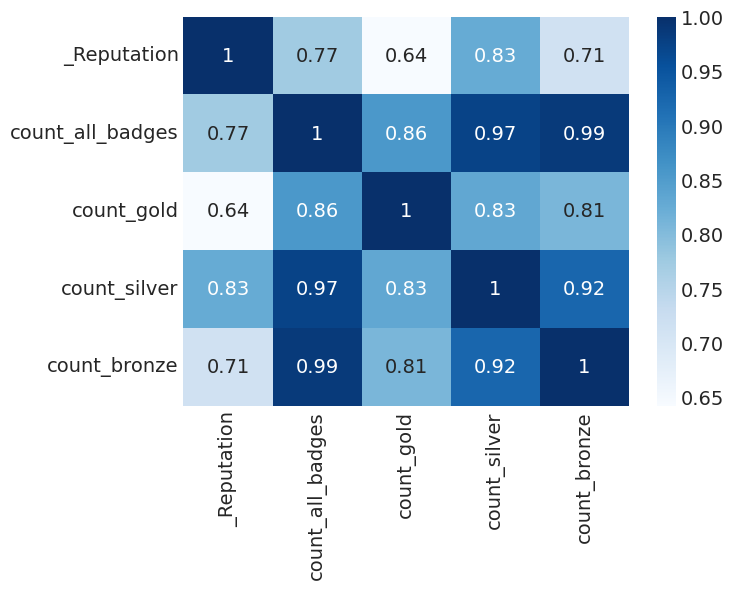

In [47]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

## RQ 2.2 Is user reputation correlated to quality of answer?

### Metric 1: Sum of score

In [21]:
df = pd.read_parquet('parquet/rq2_2_1').drop('_Id', axis=1)

In [22]:
df.sort_values(by=['sum_score'], ascending=False).head(10)

,_Reputation,sum_score
2606453,1371965,479299
9557731,1173022,216138
3763987,1060587,183588
6082633,999554,177374
15735909,1008138,150083
9364593,998436,138019
3570871,994312,130182
13033133,918974,121798
18923621,1218868,111505
12646478,851974,105881


In [23]:
# Remove outliers
df.drop(df[df['sum_score'] > 150000].index, inplace=True)

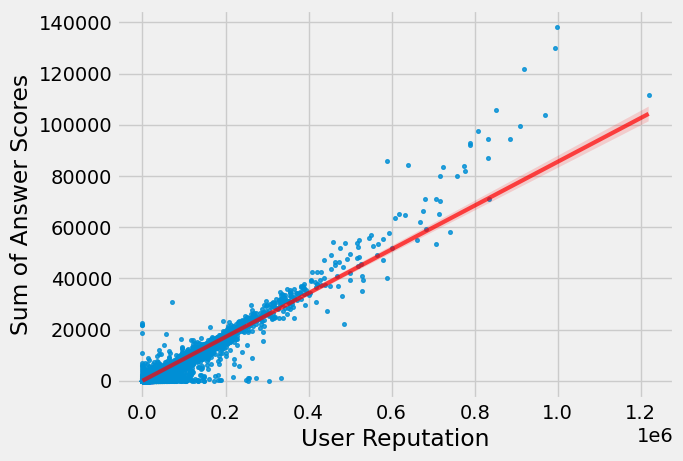

In [26]:
ax = sns.regplot(x=df['_Reputation'], y=df['sum_score'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Sum of Answer Scores')
plt.show()

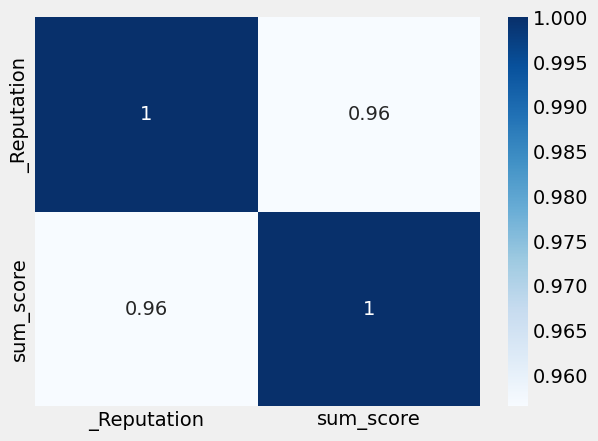

In [27]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

### Metric 1b: Average of score

In [3]:
df = pd.read_parquet('parquet/rq2_2_1m').drop('_Id', axis=1)

In [5]:
df.sort_values(by=['avg_score'], ascending=False).head(20)

,_Reputation,avg_score
18823893,91743,9169.000000
6469206,49363,4869.000000
11488156,26763,4752.000000
12936119,2737,4364.000000
12548927,5929,4230.000000
6662246,3451,3504.000000
8790399,28605,2854.000000
18150456,26639,2662.000000
4245914,4765,2548.000000
5117791,24705,2464.000000


In [6]:
# Remove outliers
df.drop(df[df['avg_score'] > 3000].index, inplace=True)

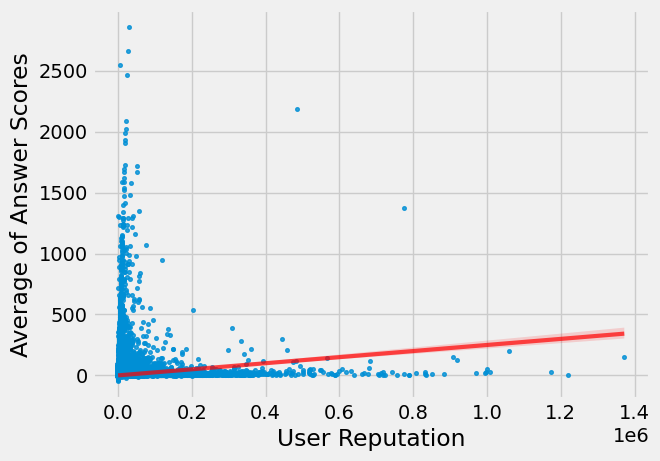

In [7]:
ax = sns.regplot(x=df['_Reputation'], y=df['avg_score'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Average of Answer Scores')
plt.show()

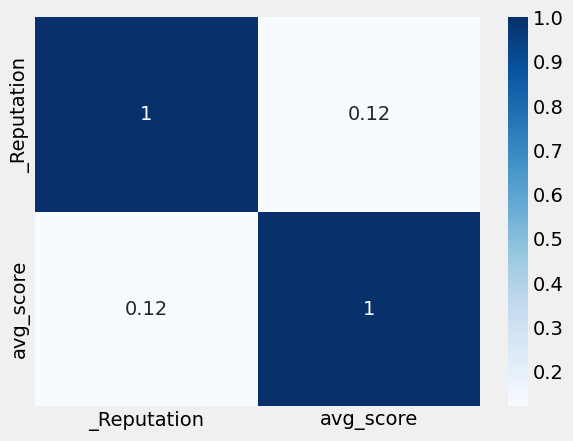

In [8]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

### Metric 2: Count of accepted answers

In [30]:
df = pd.read_parquet('parquet/rq2_2_2').drop('_Id', axis=1)

In [32]:
df.sort_values(by=['count_accepted_answer'], ascending=False).head(20)

,count_accepted_answer,_Reputation
1155195,37207,1218868
808494,22283,774715
159316,22182,1371965
214933,20011,835076
478275,16932,706826
153843,14707,741031
370719,14569,999554
403123,14549,588948
118090,13747,969918
218126,13388,994312


In [33]:
# Remove outliers
df.drop(df[df['count_accepted_answer'] > 15000].index, inplace=True)

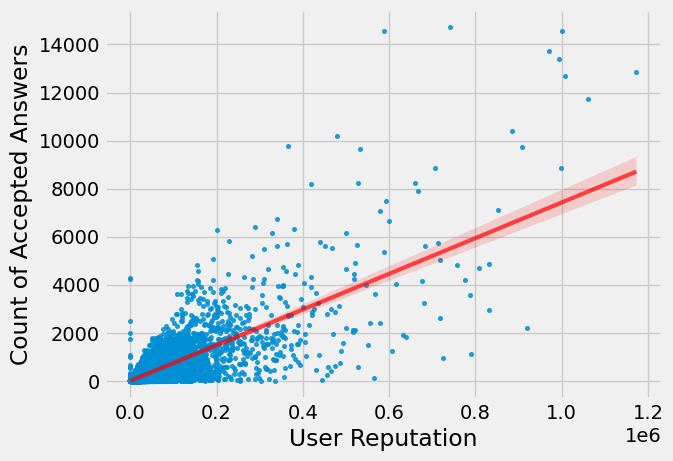

In [34]:
ax = sns.regplot(x=df['_Reputation'], y=df['count_accepted_answer'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Count of Accepted Answers')
plt.show()

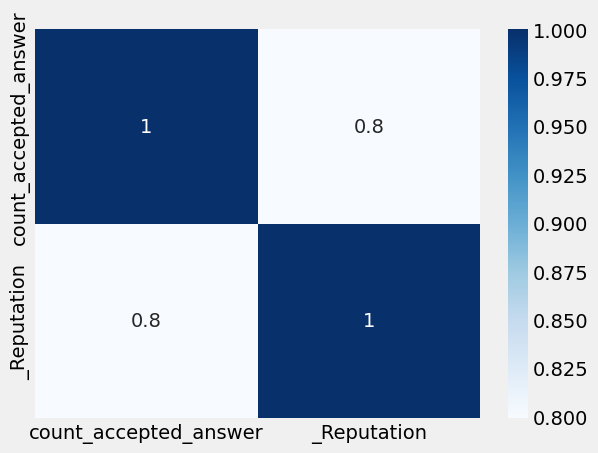

In [38]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

## RQ 2.3 Is user reputation correlated to quality of question?

### Metric 1: Sum of score

In [41]:
df = pd.read_parquet('parquet/rq2_3_1').drop('_Id', axis=1)

In [42]:
df.sort_values(by=['sum_score'], ascending=False).head(20)

,_Reputation,sum_score
14288973,486173,39322
16894649,334388,32099
1448189,273646,31033
8013425,565397,30084
4053684,303602,30057
5695435,48647,27140
483577,248482,26665
12742906,253624,25277
6952636,255537,24486
12356043,253252,24369


In [43]:
# Remove outliers
df.drop(df[df['sum_score'] > 20000].index, inplace=True)

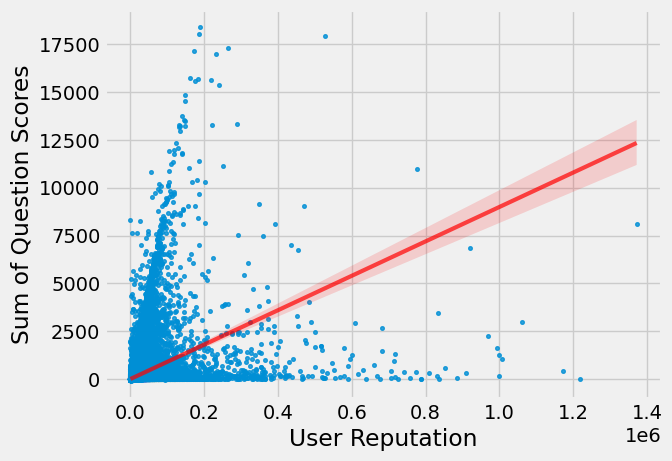

In [44]:
ax = sns.regplot(x=df['_Reputation'], y=df['sum_score'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Sum of Question Scores')
plt.show()

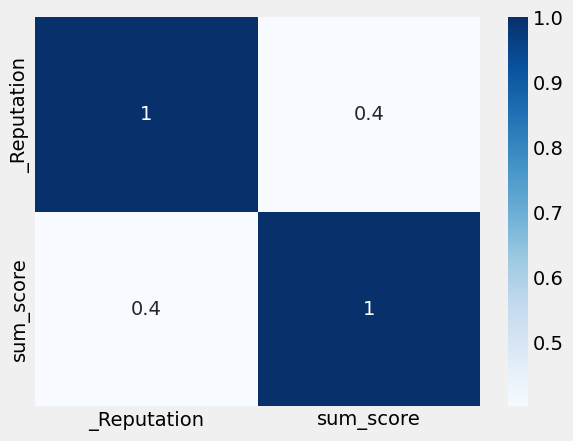

In [45]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

### Metric 1b: Average of score

In [9]:
df = pd.read_parquet('parquet/rq2_3_1m').drop('_Id', axis=1)

In [10]:
df.sort_values(by=['avg_score'], ascending=False).head(20)

,_Reputation,avg_score
18823893,91743,9169.000000
6469206,49363,4869.000000
11488156,26763,4752.000000
12936119,2737,4364.000000
12548927,5929,4230.000000
6662246,3451,3504.000000
8790399,28605,2854.000000
18150456,26639,2662.000000
4245914,4765,2548.000000
5117791,24705,2464.000000


In [11]:
# Remove outliers
df.drop(df[df['avg_score'] > 3000].index, inplace=True)

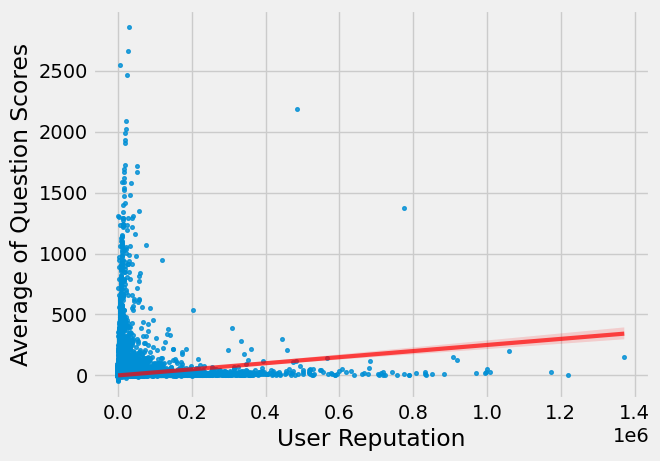

In [12]:
ax = sns.regplot(x=df['_Reputation'], y=df['avg_score'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Average of Question Scores')
plt.show()

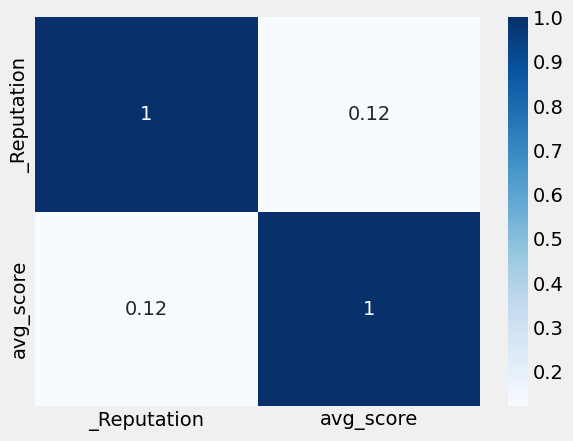

In [13]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

### Metric 2: Sum of view counts

In [46]:
df = pd.read_parquet('parquet/rq2_3_2').drop('_Id', axis=1)

In [48]:
df.sort_values(by=['sum_viewcount'], ascending=False).head(20)

,_Reputation,sum_viewcount
4053684,303602,35447325
2606419,182209,33281571
12742906,253624,30656621
6952636,255537,30499397
483577,248482,30378594
4632296,219300,24363907
2413122,54902,23523776
19017762,118341,22125608
194193,133194,20121809
17183987,182986,19994294


In [49]:
# Remove outliers
df.drop(df[df['sum_viewcount'] > 20000000].index, inplace=True)

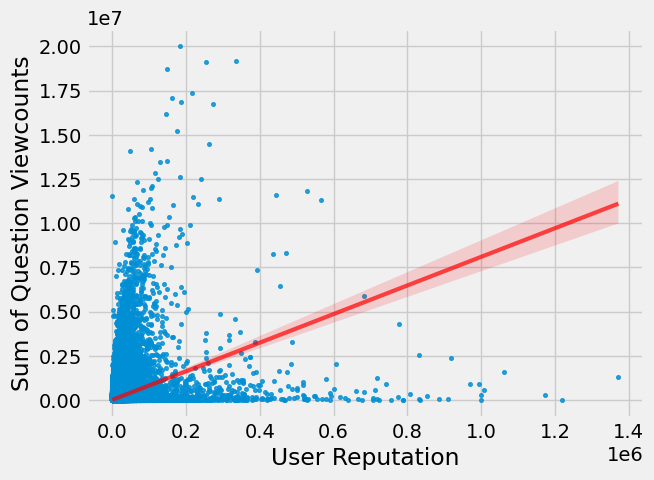

In [50]:
ax = sns.regplot(x=df['_Reputation'], y=df['sum_viewcount'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Sum of Question Viewcounts')
plt.show()

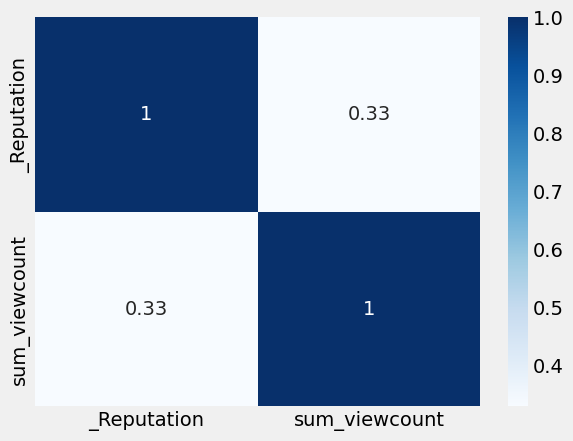

In [51]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

### Metric 3: Percentage of answered questions

In [55]:
df = pd.read_parquet('parquet/rq2_3_3').drop('_OwnerUserId', axis=1)

In [59]:
df.sort_values(by=['percent_answered'], ascending=False).head(20)

,question_asked,question_answered,percent_answered,_Reputation
0,4,4,1.0,12389.0
2077850,1,1,1.0,1.0
2077833,1,1,1.0,3.0
2077831,1,1,1.0,43.0
2077830,2,2,1.0,35.0
2077821,1,1,1.0,13.0
2077817,2,2,1.0,35.0
2077816,2,2,1.0,13.0
2077813,1,1,1.0,13.0
2077810,1,1,1.0,1.0


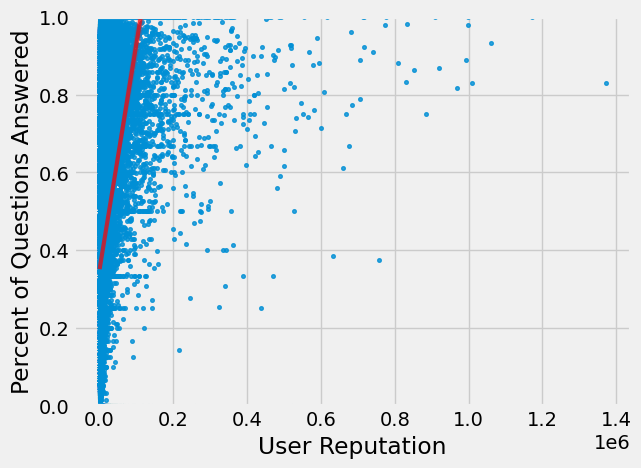

In [65]:
ax = sns.regplot(x=df['_Reputation'], y=df['percent_answered'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Percent of Questions Answered', ylim=(0, 1))
plt.show()

### Metric 4: Count of answered questions

In [61]:
df = pd.read_parquet('parquet/rq2_3_3').drop('_OwnerUserId', axis=1)

In [62]:
df.sort_values(by=['question_answered'], ascending=False).head(20)

,question_asked,question_answered,percent_answered,_Reputation
3121210,2959,2254,0.7617,105220.0
1916017,2373,2060,0.8681,6821.0
638259,1812,1745,0.9630,182209.0
968938,1921,1654,0.8610,50340.0
590904,1859,1553,0.8354,54902.0
3120002,2615,1408,0.5384,253624.0
782255,2033,1303,0.6409,77342.0
1347686,1356,1295,0.9550,141626.0
118579,1580,1263,0.7994,248482.0
4279365,1691,1196,0.7073,105718.0


In [63]:
# Remove outliers
df.drop(df[df['question_answered'] > 1500].index, inplace=True)

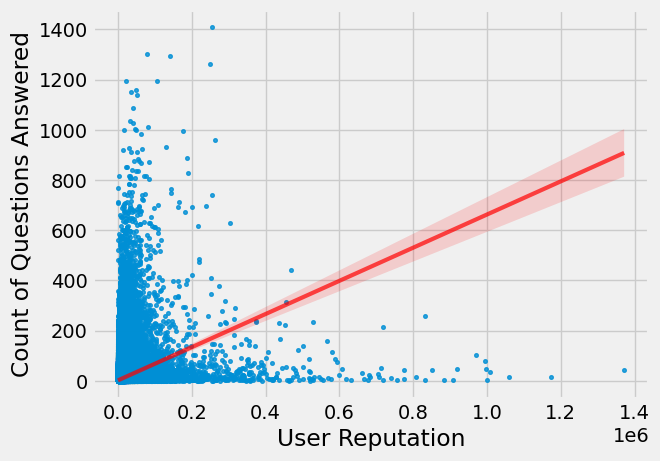

In [64]:
ax = sns.regplot(x=df['_Reputation'], y=df['question_answered'], line_kws={"color":"r","alpha":0.7,"lw":3}, scatter_kws={"s":7})
ax.set(xlabel='User Reputation', ylabel='Count of Questions Answered')
plt.show()

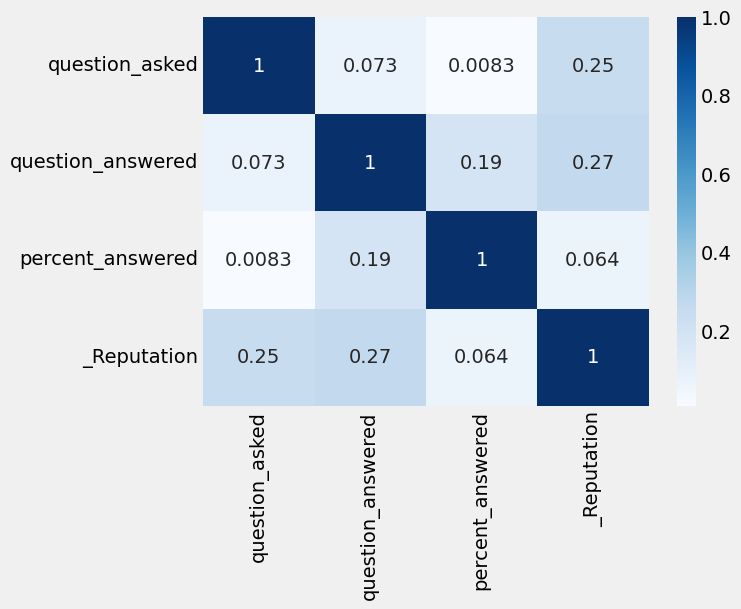

In [58]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()